In [9]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate a sample dataset (replace with your actual dataset)
# # For demonstration, we'll create a sine wave with added noise
# sample_rate = 500  # Sampling rate in Hz
# duration = 2  # Duration in seconds
# t = np.linspace(0, duration, 2000, endpoint=False)  # Time vector with 2000 points
# frequency = 5  # Frequency of the sine wave in Hz
# data = np.sin(2 * np.pi * frequency * t) + 0.5 * np.random.randn(2000)  # Add some noise

# # Perform the FFT
# fft_result = np.fft.fft(data)  # Compute FFT
# fft_magnitude = np.abs(fft_result)  # Magnitude of the FFT
# fft_frequency = np.fft.fftfreq(len(data), 1 / sample_rate)  # Frequency bins

# # Keep only the positive half of the spectrum (since it's symmetrical)
# positive_freqs = fft_frequency[: len(fft_frequency) // 2]
# positive_magnitude = fft_magnitude[: len(fft_magnitude) // 2]

# # Plot the original dataset
# plt.figure(figsize=(12, 6))
# plt.subplot(2, 1, 1)
# plt.plot(t, data)
# plt.title("Original Dataset (Time Domain)")
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")

# # Plot the FFT result
# plt.subplot(2, 1, 2)
# plt.plot(positive_freqs, positive_magnitude, color="r")
# plt.title("FFT Result (Frequency Domain)")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.tight_layout()

# # Show the plots
# plt.show()

##-----------------------------------------------------------------------##
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate a sample dataset (replace with your actual dataset)
# For demonstration, we'll create a sine wave with added noise
sample_rate = 500  # Sampling rate in Hz
duration = 2  # Duration in seconds
t = np.linspace(0, duration, 2000, endpoint=False)  # Time vector with 2000 points
frequency = 5  # Frequency of the sine wave in Hz
data = np.sin(2 * np.pi * frequency * t) + 0.5 * np.random.randn(2000)  # Add some noise

# Perform the FFT
fft_result = np.fft.fft(data)  # Compute FFT
fft_magnitude = np.abs(fft_result)  # Magnitude of the FFT
fft_frequency = np.fft.fftfreq(len(data), 1 / sample_rate)  # Frequency bins

# Keep only the positive half of the spectrum (since it's symmetrical)
positive_freqs = fft_frequency[:len(fft_frequency) // 2]
positive_magnitude = fft_magnitude[:len(fft_magnitude) // 2]

# Create a figure for animation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Set up the first plot (Time Domain)
line1, = ax1.plot([], [], label="Original Data", color="b")
ax1.set_xlim(0, duration)
ax1.set_ylim(np.min(data), np.max(data))
ax1.set_title("Original Dataset (Time Domain)")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")
ax1.legend(loc="upper right")

# Set up the second plot (Frequency Domain)
line2, = ax2.plot([], [], label="FFT Magnitude", color="r")
ax2.set_xlim(np.min(positive_freqs), np.max(positive_freqs))
ax2.set_ylim(0, np.max(positive_magnitude))
ax2.set_title("FFT Result (Frequency Domain)")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude")
ax2.legend(loc="upper right")

# Initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

# Update function: animate the plots
def update(frame):
    # Update the time-domain plot (Data)
    line1.set_data(t[:frame], data[:frame])

    # Update the frequency-domain plot (FFT)
    line2.set_data(positive_freqs[:frame], positive_magnitude[:frame])

    return line1, line2

# Create the animation with blit=False for better compatibility
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=False, interval=10)

# Display the animation
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

     0    1
0  NaN    0
1  0.0  409
2  1.0  408
3  2.0  408
4  3.0  408
Index([0, 1], dtype='int64')


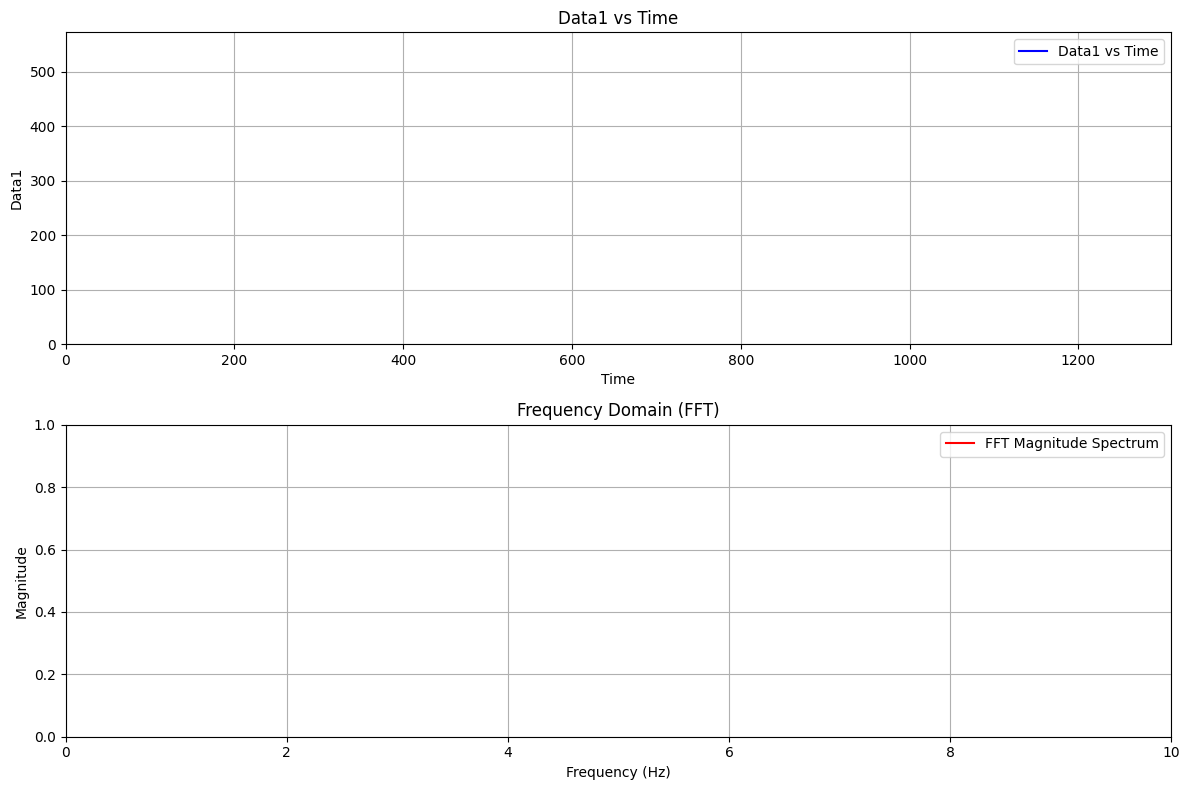

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.signal import find_peaks
# import matplotlib.cm as cm

# # Replace 'data.csv' with the path to your file
# file_path = "IR_dataset_running.csv - IR_dataset_running.csv.csv"

# # Read the CSV file
# df = pd.read_csv(file_path, header=None, names=["Time", "Data"])

# # --- Plot 1: Original Data vs Time ---
# plt.figure(figsize=(10, 6))
# plt.plot(df["Time"], df["Data"], label="Data vs Time", color="blue")
# plt.xlabel("Time")
# plt.ylabel("Data")
# plt.title("Data vs Time")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Apply FFT to the Data column
# data_fft = np.fft.fft(df["Data"])
# frequencies = np.fft.fftfreq(
#     len(data_fft), d=(df["Time"].diff().mean() / 1000)
# )  # Convert time to seconds

# # Keep only positive frequencies and ignore the 0 Hz component
# positive_freqs = frequencies[frequencies > 0]
# fft_magnitudes = np.abs(data_fft[frequencies > 0])

# # --- Plot 2: FFT Magnitude Spectrum (Original) ---
# plt.figure(figsize=(10, 6))
# plt.plot(positive_freqs, fft_magnitudes, label="FFT Magnitude Spectrum", color="red")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.title("Frequency Domain (FFT)")
# plt.legend()
# plt.grid(True)
# plt.show()

# # --- Finding Peaks in FFT Magnitudes ---
# peaks, _ = find_peaks(
#     fft_magnitudes, height=0.1
# )  # Threshold set at 0.1 for peak detection

# # Create a DataFrame for the frequencies and magnitudes
# df_fft = pd.DataFrame({"Frequency (Hz)": positive_freqs, "Magnitude": fft_magnitudes})

# # Sort the DataFrame by Magnitude in descending order
# df_sorted = df_fft.sort_values(by="Magnitude", ascending=False)

# # Display the sorted table of frequencies and their magnitudes
# print("Sorted Frequency-Magnitude Table:")
# print(df_sorted)

# # --- Plot 3: Color-Coded FFT Magnitude Spectrum ---
# # Create a color map based on magnitude
# norm = plt.Normalize(vmin=fft_magnitudes.min(), vmax=fft_magnitudes.max())
# cmap = cm.viridis

# plt.figure(figsize=(10, 6))
# sc = plt.scatter(positive_freqs, fft_magnitudes, c=fft_magnitudes, cmap=cmap, norm=norm)
# plt.colorbar(sc, label="Magnitude")  # Color bar showing magnitude
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.title("FFT Magnitude Spectrum (Color-Coded)")

# # Highlight peaks in green
# plt.scatter(
#     positive_freqs[peaks],
#     fft_magnitudes[peaks],
#     color="green",
#     label="Good Frequencies",
#     zorder=5,
# )

# plt.legend()
# plt.grid(True)
# plt.show()

## -------------------------------------------------------------##
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Replace 'data.csv' with the path to your file
file_path = "IR_dataset_running.csv - IR_dataset_running.csv.csv"

# Read the CSV file
df = pd.read_csv(file_path, header=None)

# Print the first few rows and check the column structure
print(df.head())
print(df.columns)

# Rename the columns if necessary
if len(df.columns) == 2:
    df.columns = ["Timestamp", "Data1"]  # If there are only two columns
elif len(df.columns) == 3:
    df.columns = ["Timestamp", "Data1", "Data2"]  # If there are three columns
else:
    raise ValueError("Unexpected number of columns in the data.")


# --- FFT Calculation ---
def compute_fft(data, sample_rate):
    """Compute FFT and return positive frequencies and their magnitudes."""
    data_fft = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(data), d=(1 / sample_rate))  # Convert time to Hz
    positive_freqs = frequencies[frequencies > 0]
    fft_magnitudes = np.abs(data_fft[frequencies > 0])
    return positive_freqs, fft_magnitudes


# Sample rate (just an estimate, can be adjusted based on your data)
sample_rate = 1 / (df["Timestamp"].diff().mean() / 1000)  # Hz

# Prepare data for the animation
time_data = df["Timestamp"]
data1 = df["Data1"]

# Prepare the figure and axes for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# --- Plotting Functions ---
# Line plot for data1 vs time
(line_data,) = ax1.plot([], [], label="Data1 vs Time", color="blue")
ax1.set_xlim(time_data.min(), time_data.max())
ax1.set_ylim(data1.min(), data1.max())
ax1.set_xlabel("Time")
ax1.set_ylabel("Data1")
ax1.set_title("Data1 vs Time")
ax1.grid(True)
ax1.legend()

# FFT magnitude plot
(fft_line,) = ax2.plot([], [], label="FFT Magnitude Spectrum", color="red")
ax2.set_xlim(0, 10)  # You can adjust this based on your data's frequency range
ax2.set_ylim(0, 1)
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude")
ax2.set_title("Frequency Domain (FFT)")
ax2.grid(True)
ax2.legend()


# --- Initialization Function ---
def init():
    line_data.set_data([], [])
    fft_line.set_data([], [])
    return line_data, fft_line


# --- Update Function for Animation ---
def update(frame):
    # Update Time Domain Plot
    current_time = time_data[:frame]
    current_data = data1[:frame]
    line_data.set_data(current_time, current_data)

    # Update FFT Plot
    positive_freqs, fft_magnitudes = compute_fft(current_data, sample_rate)
    fft_line.set_data(positive_freqs, fft_magnitudes)

    return line_data, fft_line


# --- Create Animation ---
ani = FuncAnimation(
    fig, update, frames=len(time_data), init_func=init, blit=True, interval=50
)

# Show the animation
plt.tight_layout()
plt.show()

C:\Users\dipeghos\AppData\Local\Temp\ipykernel_48860\2039881552.py:164: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


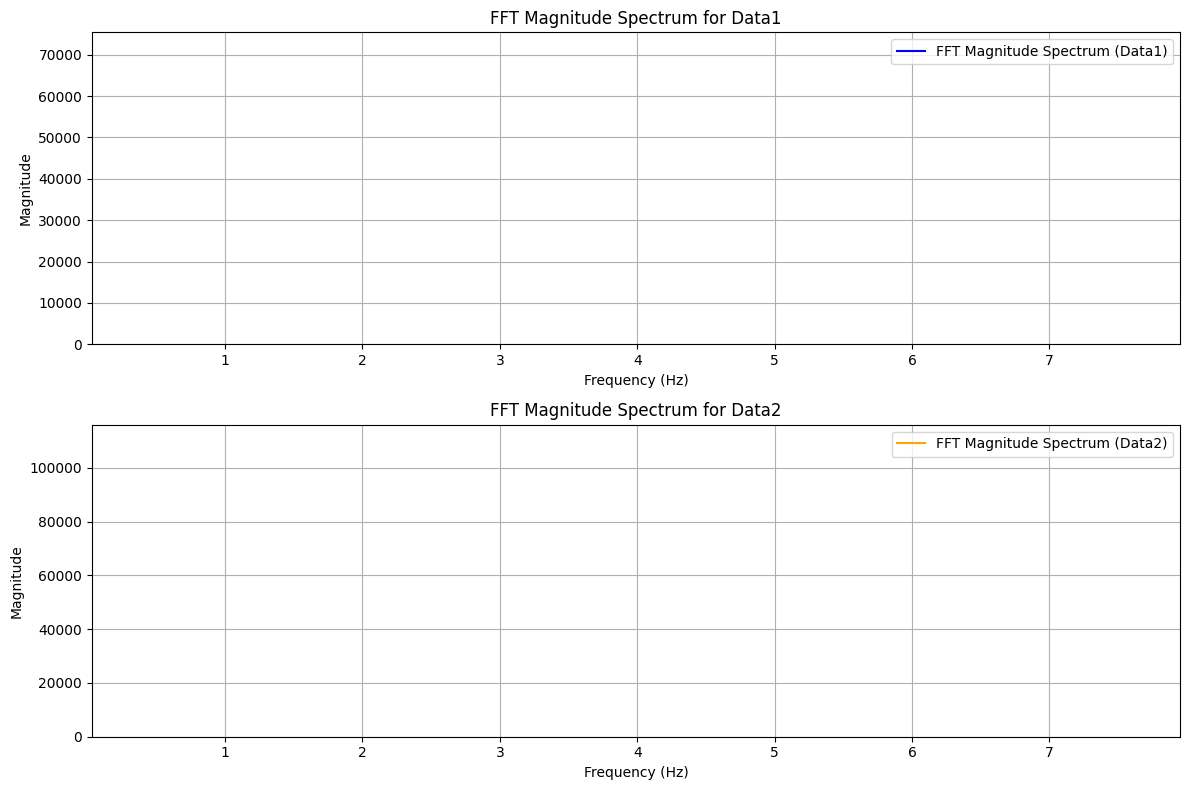

In [ ]:
# import pandas as pd
# import numpy as np
# from scipy.signal import find_peaks
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# # Replace 'data.csv' with the path to your file
# file_path = "IR_dataset_pulse_oximeter_log.csv"

# # Read the space-separated file
# df = pd.read_csv(
#     file_path, delim_whitespace=True, header=None, names=["Timestamp", "Data1", "Data2"]
# )

# # Convert the 'Timestamp' column from milliseconds to datetime
# df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="ms")

# # Apply FFT to Data1
# data1_fft = np.fft.fft(df["Data1"])
# frequencies1 = np.fft.fftfreq(
#     len(data1_fft), d=(df["Timestamp"].diff().dt.total_seconds().mean())
# )

# # Apply FFT to Data2
# data2_fft = np.fft.fft(df["Data2"])
# frequencies2 = np.fft.fftfreq(
#     len(data2_fft), d=(df["Timestamp"].diff().dt.total_seconds().mean())
# )

# # Keep only positive frequencies and ignore the 0 Hz component for Data1
# positive_freqs1 = frequencies1[frequencies1 > 0]
# fft_magnitudes1 = np.abs(data1_fft[frequencies1 > 0])

# # Create a DataFrame for the frequencies and magnitudes for Data1
# df1 = pd.DataFrame({"Frequency (Hz)": positive_freqs1, "Magnitude": fft_magnitudes1})

# # Sort the DataFrame by Magnitude in descending order
# df1_sorted = df1.sort_values(by="Magnitude", ascending=False)

# # Display the sorted table for Data1
# print("Sorted Frequency-Magnitude Table for Data1:")
# print(df1_sorted)

# # Keep only positive frequencies and ignore the 0 Hz component for Data2
# positive_freqs2 = frequencies2[frequencies2 > 0]
# fft_magnitudes2 = np.abs(data2_fft[frequencies2 > 0])

# # Create a DataFrame for the frequencies and magnitudes for Data2
# df2 = pd.DataFrame({"Frequency (Hz)": positive_freqs2, "Magnitude": fft_magnitudes2})

# # Sort the DataFrame by Magnitude in descending order
# df2_sorted = df2.sort_values(by="Magnitude", ascending=False)

# # Display the sorted table for Data2
# print("Sorted Frequency-Magnitude Table for Data2:")
# print(df2_sorted)

# # --- Plot 1: Original Frequency vs Magnitude Spectrum for Data1 ---
# plt.figure(figsize=(12, 6))
# plt.plot(
#     positive_freqs1,
#     fft_magnitudes1,
#     label="FFT Magnitude Spectrum (Data1)",
#     color="blue",
# )
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.title("Frequency Domain (FFT) - Data1 (Original)")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # --- Plot 2: Color-Coded Frequency vs Magnitude Spectrum for Data1 ---
# # Create a color map based on magnitude for Data1
# norm1 = plt.Normalize(vmin=fft_magnitudes1.min(), vmax=fft_magnitudes1.max())
# cmap1 = cm.viridis

# plt.figure(figsize=(12, 6))
# sc1 = plt.scatter(
#     positive_freqs1,
#     fft_magnitudes1,
#     c=fft_magnitudes1,
#     cmap=cmap1,
#     norm=norm1,
#     label="FFT Magnitude Spectrum (Data1)",
# )
# plt.colorbar(sc1, label="Magnitude")  # Color bar showing magnitude
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.title("Frequency Domain (FFT) - Data1 with Color Coding")
# peaks1, _ = find_peaks(fft_magnitudes1, height=0.1)
# plt.scatter(
#     positive_freqs1[peaks1],
#     fft_magnitudes1[peaks1],
#     color="green",
#     label="Good Frequencies",
#     zorder=5,
# )
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # --- Plot 3: Original Frequency vs Magnitude Spectrum for Data2 ---
# plt.figure(figsize=(12, 6))
# plt.plot(
#     positive_freqs2,
#     fft_magnitudes2,
#     label="FFT Magnitude Spectrum (Data2)",
#     color="orange",
# )
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.title("Frequency Domain (FFT) - Data2 (Original)")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # --- Plot 4: Color-Coded Frequency vs Magnitude Spectrum for Data2 ---
# # Create a color map based on magnitude for Data2
# norm2 = plt.Normalize(vmin=fft_magnitudes2.min(), vmax=fft_magnitudes2.max())
# cmap2 = cm.viridis

# plt.figure(figsize=(12, 6))
# sc2 = plt.scatter(
#     positive_freqs2,
#     fft_magnitudes2,
#     c=fft_magnitudes2,
#     cmap=cmap2,
#     norm=norm2,
#     label="FFT Magnitude Spectrum (Data2)",
# )
# plt.colorbar(sc2, label="Magnitude")  # Color bar showing magnitude
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")
# plt.title("Frequency Domain (FFT) - Data2 with Color Coding")
# peaks2, _ = find_peaks(fft_magnitudes2, height=0.1)
# plt.scatter(
#     positive_freqs2[peaks2],
#     fft_magnitudes2[peaks2],
#     color="green",
#     label="Good Frequencies",
#     zorder=5,
# )
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

##-------------------------------------------------------------------##
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation

# Replace 'data.csv' with the path to your file
file_path = "IR_dataset_pulse_oximeter_log.csv"

# Read the space-separated file
df = pd.read_csv(
    file_path, delim_whitespace=True, header=None, names=["Timestamp", "Data1", "Data2"]
)

# Convert the 'Timestamp' column from milliseconds to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="ms")

# Apply FFT to Data1
data1_fft = np.fft.fft(df["Data1"])
frequencies1 = np.fft.fftfreq(
    len(data1_fft), d=(df["Timestamp"].diff().dt.total_seconds().mean())
)

# Apply FFT to Data2
data2_fft = np.fft.fft(df["Data2"])
frequencies2 = np.fft.fftfreq(
    len(data2_fft), d=(df["Timestamp"].diff().dt.total_seconds().mean())
)

# Keep only positive frequencies and ignore the 0 Hz component for Data1
positive_freqs1 = frequencies1[frequencies1 > 0]
fft_magnitudes1 = np.abs(data1_fft[frequencies1 > 0])

# Keep only positive frequencies and ignore the 0 Hz component for Data2
positive_freqs2 = frequencies2[frequencies2 > 0]
fft_magnitudes2 = np.abs(data2_fft[frequencies2 > 0])

# --- Create the Animation Function ---
# Set up the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot Data1's frequency spectrum (initially empty)
(line1,) = ax1.plot([], [], label="FFT Magnitude Spectrum (Data1)", color="blue")
ax1.set_xlim(positive_freqs1.min(), positive_freqs1.max())
ax1.set_ylim(0, fft_magnitudes1.max())
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Magnitude")
ax1.set_title("FFT Magnitude Spectrum for Data1")
ax1.grid(True)
ax1.legend()

# Plot Data2's frequency spectrum (initially empty)
(line2,) = ax2.plot([], [], label="FFT Magnitude Spectrum (Data2)", color="orange")
ax2.set_xlim(positive_freqs2.min(), positive_freqs2.max())
ax2.set_ylim(0, fft_magnitudes2.max())
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude")
ax2.set_title("FFT Magnitude Spectrum for Data2")
ax2.grid(True)
ax2.legend()


# --- Initialization Function ---
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2


# --- Update Function for Animation ---
def update(frame):
    # Update Data1's FFT Magnitude Spectrum
    line1.set_data(positive_freqs1[:frame], fft_magnitudes1[:frame])

    # Update Data2's FFT Magnitude Spectrum
    line2.set_data(positive_freqs2[:frame], fft_magnitudes2[:frame])

    return line1, line2


# --- Create the Animation ---
ani = FuncAnimation(
    fig, update, frames=len(positive_freqs1), init_func=init, blit=True, interval=50
)

# Display the animation
plt.tight_layout()
plt.show()